iteratively

In [1]:
def knapsack_bottom_up(values, weights, capacity):
    n = len(values)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]

    # Fill DP table
    for i in range(1, n + 1):
        for w in range(capacity + 1):
            if weights[i - 1] <= w:
                # Max of including or excluding the item
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]

    return dp[n][capacity]

memoization

In [2]:
def knapsack_top_down(values, weights, capacity):
    n = len(values)
    memo = {}

    def helper(i, w):
        if i == 0 or w == 0:
            return 0

        if (i, w) in memo:
            return memo[(i, w)]

        if weights[i - 1] > w:
            memo[(i, w)] = helper(i - 1, w)
        else:
            memo[(i, w)] = max(
                helper(i - 1, w), 
                helper(i - 1, w - weights[i - 1]) + values[i - 1]
            )
        return memo[(i, w)]

    return helper(n, capacity)

Test

In [3]:
values = [60, 100, 120]
weights = [10, 20, 30]
capacity = 50

print("Bottom-Up:", knapsack_bottom_up(values, weights, capacity))  
print("Top-Down:", knapsack_top_down(values, weights, capacity))    

Bottom-Up: 220
Top-Down: 220


Performance Comparison

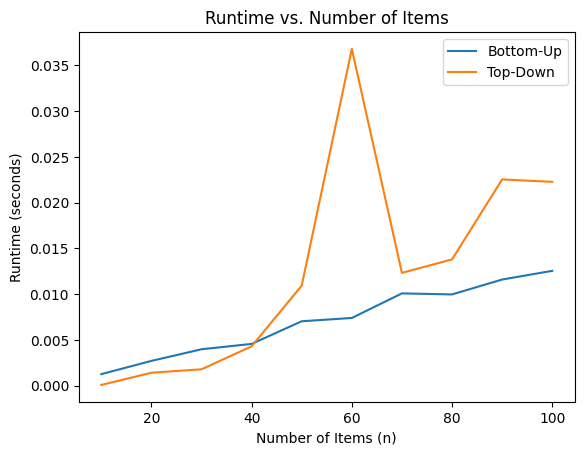

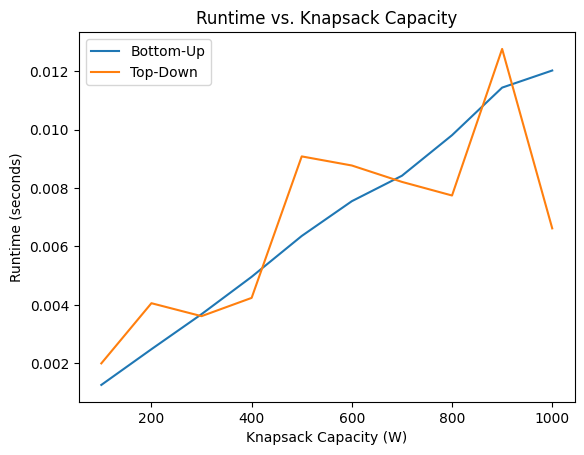

In [4]:
import random
import time
import matplotlib.pyplot as plt

# Bottom-Up Knapsack Function
def knapsack_bottom_up(values, weights, capacity):
    n = len(values)
    dp = [[0] * (capacity + 1) for _ in range(n + 1)]
    for i in range(1, n + 1):
        for w in range(capacity + 1):
            if weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]
    return dp[n][capacity]

# Top-Down Knapsack Function
def knapsack_top_down(values, weights, capacity):
    n = len(values)
    memo = {}

    def helper(i, w):
        if i == 0 or w == 0:
            return 0
        if (i, w) in memo:
            return memo[(i, w)]
        if weights[i - 1] > w:
            memo[(i, w)] = helper(i - 1, w)
        else:
            memo[(i, w)] = max(
                helper(i - 1, w), 
                helper(i - 1, w - weights[i - 1]) + values[i - 1]
            )
        return memo[(i, w)]

    return helper(n, capacity)

# Experiment Parameters
def generate_random_input(n, max_weight, max_value):
    weights = [random.randint(1, max_weight) for _ in range(n)]
    values = [random.randint(1, max_value) for _ in range(n)]
    return values, weights

# Measure Runtime
def measure_runtime(knapsack_function, values, weights, capacity):
    start_time = time.time()
    knapsack_function(values, weights, capacity)
    return time.time() - start_time

# Run Experiments
def run_experiments():
    fixed_capacity = 500  # Fixed W
    fixed_items = 50  # Fixed n
    max_value = 100

    # Varying n (fixed W)
    ns = range(10, 101, 10)
    runtime_bottom_up_n = []
    runtime_top_down_n = []
    for n in ns:
        values, weights = generate_random_input(n, fixed_capacity, max_value)
        runtime_bottom_up_n.append(measure_runtime(knapsack_bottom_up, values, weights, fixed_capacity))
        runtime_top_down_n.append(measure_runtime(knapsack_top_down, values, weights, fixed_capacity))

    # Varying W (fixed n)
    capacities = range(100, 1001, 100)
    runtime_bottom_up_w = []
    runtime_top_down_w = []
    for capacity in capacities:
        values, weights = generate_random_input(fixed_items, capacity, max_value)
        runtime_bottom_up_w.append(measure_runtime(knapsack_bottom_up, values, weights, capacity))
        runtime_top_down_w.append(measure_runtime(knapsack_top_down, values, weights, capacity))

    # Plot Results
    # Runtime vs. n
    plt.figure()
    plt.plot(ns, runtime_bottom_up_n, label="Bottom-Up")
    plt.plot(ns, runtime_top_down_n, label="Top-Down")
    plt.xlabel("Number of Items (n)")
    plt.ylabel("Runtime (seconds)")
    plt.title("Runtime vs. Number of Items")
    plt.legend()
    plt.show()

    # Runtime vs. W
    plt.figure()
    plt.plot(capacities, runtime_bottom_up_w, label="Bottom-Up")
    plt.plot(capacities, runtime_top_down_w, label="Top-Down")
    plt.xlabel("Knapsack Capacity (W)")
    plt.ylabel("Runtime (seconds)")
    plt.title("Runtime vs. Knapsack Capacity")
    plt.legend()
    plt.show()

run_experiments()